## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [76]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [77]:
df.tail()

,DATE,TAG,POSTS
2084,2021-02-01 00:00:00,php,5483
2085,2021-02-01 00:00:00,c++,4565
2086,2021-02-01 00:00:00,go,642
2087,2021-02-01 00:00:00,ruby,609
2088,2021-02-01 00:00:00,swift,2786


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [78]:
df.shape

(2089, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [79]:
df.count()

DATE     2089
TAG      2089
POSTS    2089
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [80]:
df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2172559
java,1753271
python,1656157
c#,1463404
php,1391046
c++,713459
r,389253
c,352271
swift,289871


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [81]:
df.groupby('TAG').count().sort_values('POSTS')

,DATE,POSTS
TAG,,
go,136,136
swift,142,142
r,149,149
assembly,151,151
c,151,151
c++,151,151
delphi,151,151
java,151,151
javascript,151,151


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [82]:
df.DATE[1]

'2008-08-01 00:00:00'

In [83]:
type(pd.to_datetime(df.DATE[1]))

pandas._libs.tslibs.timestamps.Timestamp

In [84]:
df.DATE = pd.to_datetime(df.DATE)

## Data Manipulation



In [85]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [86]:
reshaped_df.shape

(152, 14)

In [87]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [88]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,510.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1650.0,753.0,105.0,NaN,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1990.0,811.0,112.0,NaN,1153.0,725.0,127.0,616.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,580.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [89]:
reshaped_df.count()

TAG
assembly      151
c             151
c#            152
c++           151
delphi        151
go            136
java          151
javascript    151
perl          151
php           151
python        151
r             149
ruby          151
swift         142
dtype: int64

In [90]:
reshaped_df.fillna(0, inplace=True)

In [91]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,510.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1650.0,753.0,105.0,0.0,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1990.0,811.0,112.0,0.0,1153.0,725.0,127.0,616.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,580.0,97.0,504.0,452.0,1.0,160.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

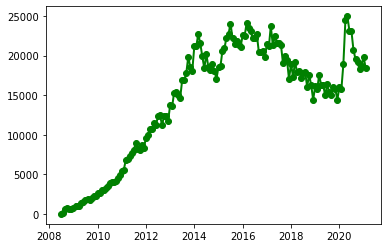

In [94]:
plt.plot(reshaped_df.index, reshaped_df.javascript, 'go-', label='line 1', linewidth=2)

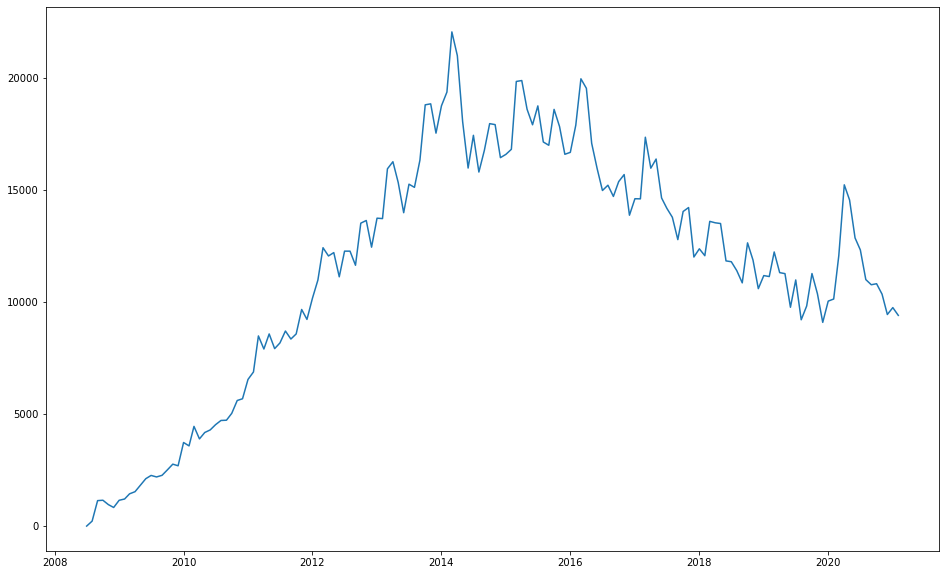

In [107]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)

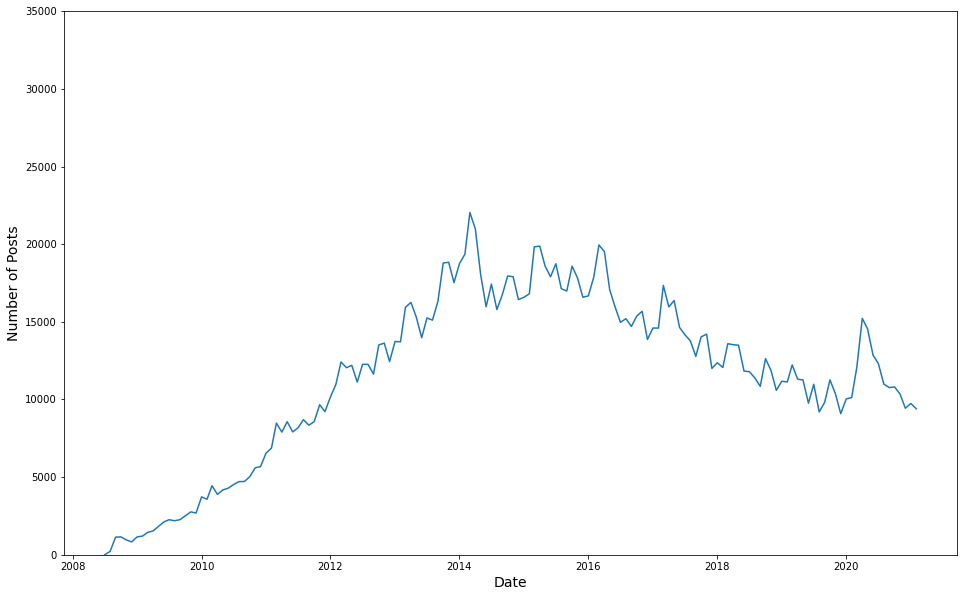

In [108]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

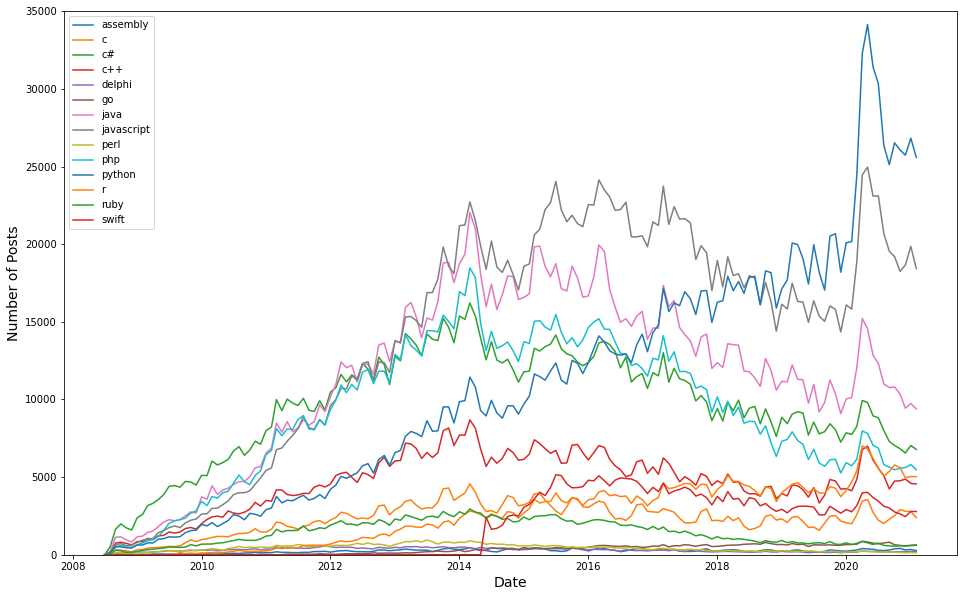

In [130]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column)
plt.legend()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

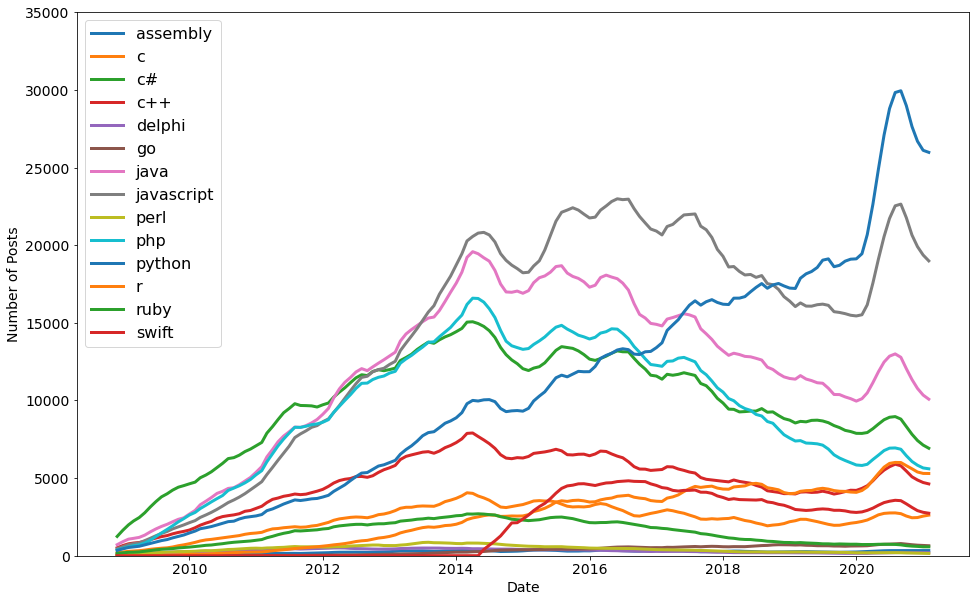

In [132]:
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=column)
 
plt.legend(fontsize=16)

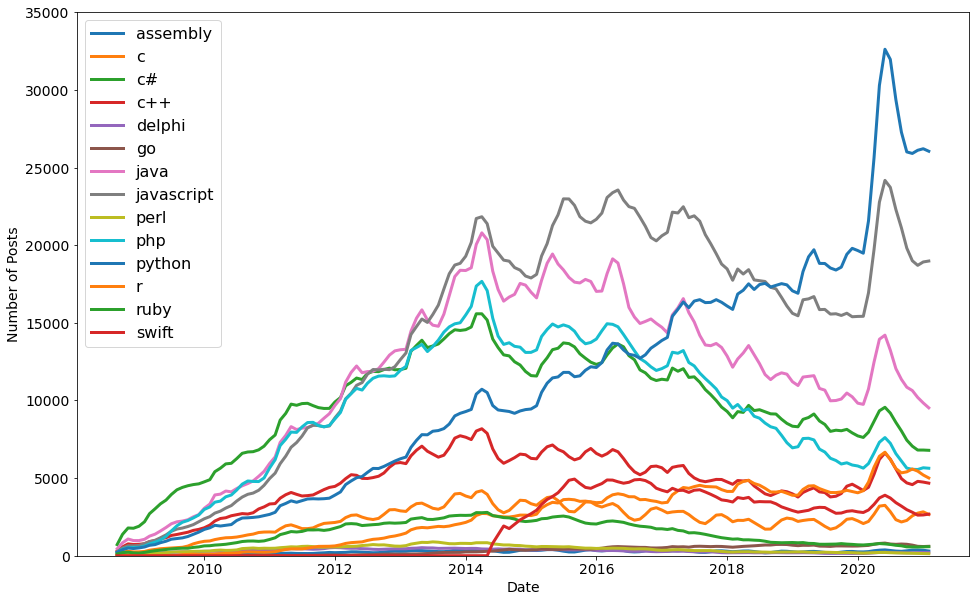

In [133]:
roll_df = reshaped_df.rolling(window=3).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=column)
 
plt.legend(fontsize=16)

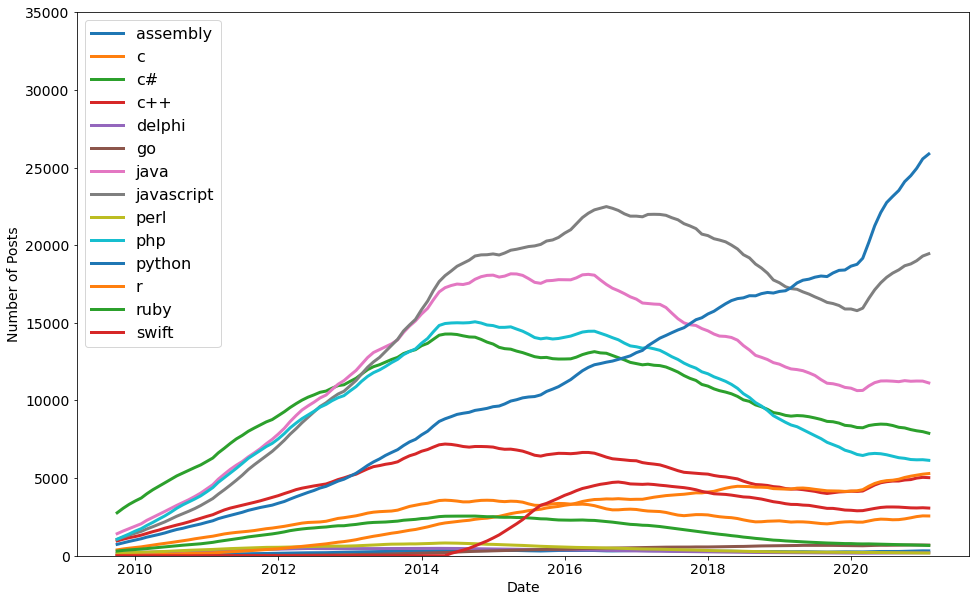

In [134]:
roll_df = reshaped_df.rolling(window=16).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=column)
 
plt.legend(fontsize=16)